# 07. 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 07-1. 결측치 정제하기

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\Doit_Python'

In [3]:
path = '/Users/James/Documents/GitHub/Doit_Python/Data'
os.chdir(path)
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\Doit_Python\\Data'

### - (p.178) 결측치 만들기: np.nan

In [4]:
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


### - (p.179) 결측치 확인하기: df.isna()

In [5]:
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [6]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [7]:
df.isna()

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [8]:
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [9]:
df.isna().sum()

sex      1
score    1
dtype: int64

### - (p.180) 결측치 제거하기: df.dropna(subset = [ ])

In [10]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [11]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

In [15]:
df_nomiss.isna().sum()

sex      1
score    0
dtype: int64

In [17]:
df_nomiss2 = df.dropna(subset = ['sex', 'score'])
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [18]:
pd.isna(df_nomiss2).sum()

sex      0
score    0
dtype: int64

In [19]:
# 아래처럼 결측치를 한 번에 제거하는 방법은 분석에 필요한 행까지 손실되는 단점이 있어 비추함
# 따라서, 위와 같이 결측치를 제거하고자 하는 열을 지정해서 열거하는 방법을 권장함
# 비추
df_nomiss3 = df.dropna()
df_nomiss3

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [22]:
pd.isna(df_nomiss3).sum()

sex      0
score    0
dtype: int64

In [23]:
# 아래의 수치 연산 함수들은 결측치가 있으면 자동으로 제거하고 연산을 수행함
# 이 경우. 데이터에 결측치가 있는 지 모른채 분석하는 우를 범하게 됨
# 따라서, 데이터의 특징을 잘 이해하고 분석하기 위해서는 df.dropna(subset = ['...'])을 이용해 명시적으로 제거하는 방법을 권장함
# 비추
df['score'].mean()

4.0

In [24]:
# 비추
df['score'].sum()

16.0

In [25]:
# 비추
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### - (p.183) 결측치 대체하기: fillna()

In [26]:
exam_raw = pd.read_csv('exam.csv')
exam = exam_raw.copy()
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [28]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.isna().sum()

id         0
nclass     0
math       3
english    0
science    0
dtype: int64

In [29]:
exam['math'].mean()

55.23529411764706

In [31]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.isna().sum()

id         0
nclass     0
math       0
english    0
science    0
dtype: int64

### - (p.185) < 혼자서 해보기 >

In [34]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [36]:
# NaN 할당하기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

#### - Q1.

In [39]:
mpg[['drv', 'hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

#### - Q2.

In [42]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean')) \
   .sort_values('mean_hwy', ascending = False)

,mean_hwy
drv,
f,28.200000
r,21.000000
4,19.242424


## 07-2. 이상치 정제하기
### - (p.186) 이상치 제거하기 - 존재할 수 없는 값

In [56]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


#### - 이상치 확인

In [57]:
df['sex'].value_counts().sort_index()

1    3
2    2
3    1
Name: sex, dtype: int64

In [58]:
df['score'].value_counts().sort_index()

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [59]:
df.groupby('score').agg(n_score = ('score', 'count'))

,n_score
score,
2,1
3,1
4,2
5,1
6,1


#### - 결측 처리하기

In [61]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [53]:
# or
df['sex'] = np.where(~df['sex'].isin([1, 2]), np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [54]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [19]:
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


#### - np.where()는 문자와 NaN을 함께 반환할 수 없다

In [62]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [63]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


#### -> np.where() 와 df.replace() 를 함께 사용하면 됨 

In [64]:
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [65]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### - (p.190) 이상치 제거하기 - 극단적인 값

In [66]:
import seaborn as sns

In [82]:
mpg_raw = pd.read_csv('mpg.csv')
mpg = mpg_raw.copy()

#### 1. 상자 그림 살펴보기

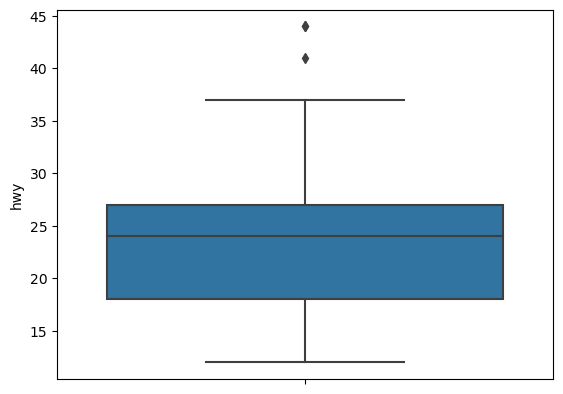

In [83]:
sns.boxplot(data = mpg, y = 'hwy');

In [84]:
mpg['hwy'].describe()

count    234.000000
mean      23.440171
std        5.954643
min       12.000000
25%       18.000000
50%       24.000000
75%       27.000000
max       44.000000
Name: hwy, dtype: float64

#### 2. 극단치 기준값 구하기

In [85]:
## (1) 1사분위수
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [86]:
## (2) 3사분위수
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [87]:
## (3) IQR
iqr = pct75 - pct25
iqr

9.0

In [88]:
## (4) 하한
limit_low = pct25 - 1.5*iqr
limit_low

4.5

In [89]:
## (5) 상한
limit_high = pct75 + 1.5*iqr
limit_high

40.5

#### 3. 극단치를 결측 처리하기

In [90]:
mpg['hwy'] = np.where((mpg['hwy'] < limit_low) | (mpg['hwy'] > limit_high), 
                      np.nan, mpg['hwy'])

In [91]:
mpg['hwy'].isna().sum()

3

#### 4. 결측치 제거하고 분석

In [93]:
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean')) \
   .sort_values('mean_hwy', ascending = False)

,mean_hwy
drv,
f,27.728155
r,21.000000
4,19.174757


### - (p.194) < 혼자서 해보기 >

In [94]:
mpg = mpg_raw.copy()
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [96]:
mpg.loc[[9, 13, 57, 92], 'drv'] = 'k'
mpg.loc[[28, 42, 128, 202], 'cty'] = [3, 4, 39, 42]

In [98]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

#### - Q1.

In [99]:
# 결측치 유무 확인
mpg[['drv', 'cty']].isna().sum()

drv    0
cty    0
dtype: int64

In [107]:
# 이상치 확인
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

In [110]:
# 이상치를 결측처리
mpg['drv'] = np.where(mpg['drv'].isin(['4', 'f', 'r']), mpg['drv'], np.nan)
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

In [111]:
mpg['drv'].isna().sum()

4

#### - Q2.

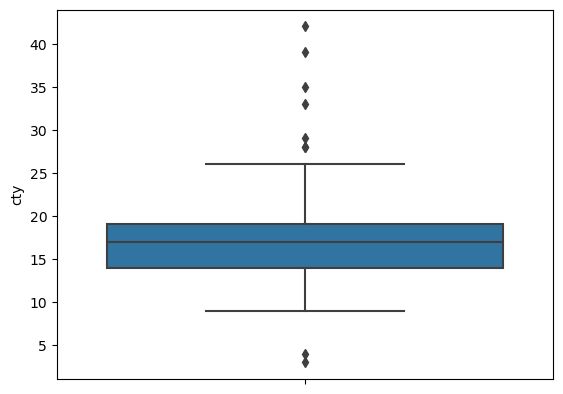

In [112]:
sns.boxplot(data = mpg, y = 'cty');

In [113]:
mpg['cty'].describe()

count    234.000000
mean      16.974359
std        4.934701
min        3.000000
25%       14.000000
50%       17.000000
75%       19.000000
max       42.000000
Name: cty, dtype: float64

In [116]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75 - pct25
limit_low = pct25 - 1.5*iqr
limit_high = pct75 + 1.5*iqr

pd.DataFrame({'cat' : ['pct25', 'pct75', 'iqr', 'limit_low', 'limit_high'],
              'value' : [pct25, pct75, iqr, limit_low, limit_high]})

,cat,value
0,pct25,14.0
1,pct75,19.0
2,iqr,5.0
3,limit_low,6.5
4,limit_high,26.5


In [117]:
mpg['cty'] = np.where((mpg['cty'] < limit_low) | (mpg['cty'] > limit_high), 
                      np.nan, mpg['cty'])

In [118]:
mpg['cty'].isna().sum()

9

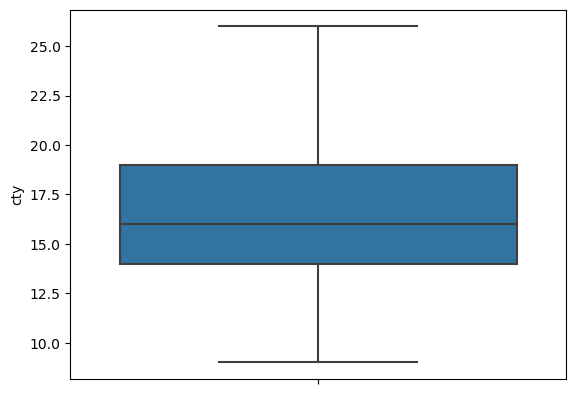

In [119]:
sns.boxplot(data = mpg, y = 'cty');

#### - Q3.

In [120]:
mpg[['drv', 'cty']].isna().sum()

drv    4
cty    9
dtype: int64

In [123]:
mpg.dropna(subset = ['drv', 'cty']) \
   .groupby('drv').agg(mean_cty = ('cty', 'mean')) \
   .sort_values('mean_cty', ascending = False)

,mean_cty
drv,
f,19.470000
4,14.247423
r,13.958333


## End.